In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for the World. 

ny_geo = r'C:\Users\Alex Lam\Desktop\Career Foundary\Citi Bike Analysis\02 Data\Raw Data\new-york-city-boroughs.geojson'

In [4]:
#Creating path string
path = r'C:\Users\Alex Lam\Desktop\Career Foundary\Citi Bike Analysis'

In [5]:
#Importing datasets
df_citi_bike= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'citi bike prepared 2.csv'))

In [6]:
# Checking the JSON file contents:

f = open(r'C:\Users\Alex Lam\Desktop\Career Foundary\Citi Bike Analysis\02 Data\Raw Data\new-york-city-boroughs.geojson')
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'name': 'Staten Island', 'cartodb_id': 1, 'created_at': '2013-03-09T02:42:03.692Z', 'updated_at': '2013-03-09T02:42:03.989Z'}, 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[-74.050508, 40.566422], [-74.050471, 40.566417], [-74.050303, 40.566417], [-74.050126, 40.566406], [-74.049984, 40.566396], [-74.049316, 40.565888], [-74.049236, 40.565363], [-74.050026, 40.565318], [-74.050744, 40.565887], [-74.050748, 40.565954], [-74.050732, 40.565992], [-74.050736, 40.566033], [-74.050803, 40.566052], [-74.050873, 40.566081], [-74.050906, 40.566094], [-74.050913, 40.566134], [-74.050882, 40.566178], [-74.050853, 40.56619], [-74.050834, 40.566197], [-74.050765, 40.566199], [-74.050708, 40.566194], [-74.050688, 40.566218], [-74.050683, 40.566237], [-74.050683, 40.56627], [-74.050679, 40.566311], [-74.050696, 40.566361], [-74.050734, 40.566395], [-74.050784, 40.566431], [-74.050839, 40.566469], [-74.050884, 40.566488], [-74.050934, 40.566528], [-74.05097

## Editing Data and Data Wrangling

In [7]:
df_citi_bike.columns

Index(['Unnamed: 0', 'day_of_week', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender', 'end_date',
       'end_hour', 'trip_duration_min', 'Age Group', 'Trip Duration Group',
       'Day of the Week Label'],
      dtype='object')

In [8]:
#Removing unneccessary columns
df_citi_bike_drop = df_citi_bike.drop(columns = 'Unnamed: 0')

In [9]:
#Creating list to find more information about trip starting and ending points
columns = ['start_hour', 'start_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_time', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'trip_duration_min', 'subscriber', 'end_hour']

In [10]:
#Creating subset from columns list
df_citi_bike_visuals = df_citi_bike_drop[columns]

In [11]:
df_citi_bike_visuals.head()

start_hour           start_time  start_station_id       start_station_name  \
0          18  2013-09-09 18:18:55               523          W 38 St & 8 Ave   
1          18  2013-09-12 18:38:53               257  Lispenard St & Broadway   
2          19  2013-09-18 19:44:04               479          9 Ave & W 45 St   
3          11  2013-09-28 11:54:37               527          E 33 St & 1 Ave   
4          18  2013-09-07 18:08:22               521          8 Ave & W 31 St   

   start_station_latitude  start_station_longitude             end_time  \
0               40.754666               -73.991382  2013-09-09 18:35:28   
1               40.719392               -74.002472  2013-09-12 18:48:34   
2               40.760193               -73.991255  2013-09-18 19:50:05   
3               40.743156               -73.974347  2013-09-28 12:03:58   
4               40.750450               -73.994811  2013-09-07 18:46:38   

   end_station_id     end_station_name  end_station_latitude  \
0             334      W 20 St & 7 Ave             40.742388   
1             236  St Marks Pl & 2 Ave             40.728419   
2             513     W 56 St & 10 Ave             40.768254   
3             441      E 52 St & 2 Ave             40.756014   
4             476      E 31 St & 3 Ave             40.743943   

   end_station_longitude  trip_duration_min      subscriber  end_hour  
0             -73.997262          16.550000      Subscriber        18  
1             -73.987140           9.683333      Subscriber        18  
2             -73.988639           6.016667      Subscriber        19  
3             -73.967416           9.350000      Subscriber        12  
4             -73.979661          38.266667  Non-Subscriber        18

<Axes: xlabel='trip_duration_min', ylabel='Count'>

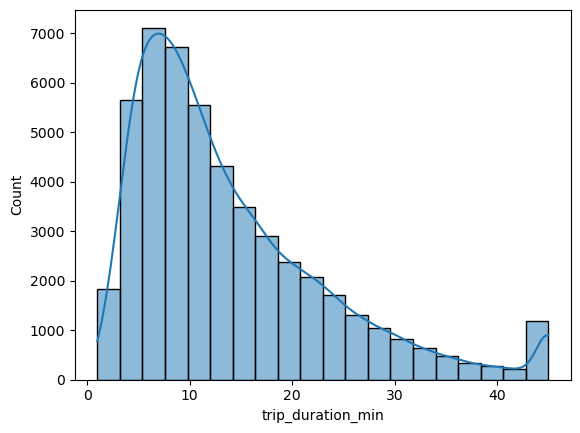

In [12]:
#Looking for extreme values in trip_duration_min variable
sns.histplot(df_citi_bike_visuals['trip_duration_min'], bins=20, kde = True)

# Creating choropleth maps

In [13]:
#Creating variables for choropleth map
df_citi_bike_visuals[['start_station_st_1', 'start_station_st_2']] = df_citi_bike_visuals['start_station_name'].str.split('&', expand=True)

C:\Users\Alex Lam\AppData\Local\Temp\ipykernel_9436\2048246091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_citi_bike_visuals[['start_station_st_1', 'start_station_st_2']] = df_citi_bike_visuals['start_station_name'].str.split('&', expand=True)
C:\Users\Alex Lam\AppData\Local\Temp\ipykernel_9436\2048246091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_citi_bike_visuals[['start_station_st_1', 'start_station_st_2']] = df_citi_bike_visuals['start_station_name'].str.split('&', expand=True)


In [14]:
df_citi_bike_visuals.columns

Index(['start_hour', 'start_time', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_time',
       'end_station_id', 'end_station_name', 'end_station_latitude',
       'end_station_longitude', 'trip_duration_min', 'subscriber', 'end_hour',
       'start_station_st_1', 'start_station_st_2'],
      dtype='object')

In [15]:
#Subset for map
df_citi_bike_visuals_start_station = df_citi_bike_visuals.groupby('start_station_st_1').agg(num_of_trips = ('trip_duration_min', 'count'))

In [16]:
#Testing output and creating start_station_st_1 column
df_citi_bike_visuals_start_station.reset_index() 

start_station_st_1  num_of_trips
0               1 Ave            594
1              10 Ave            170
2              11 Ave            284
3              12 Ave            199
4               2 Ave            416
..                 ...           ...
218        William St            123
219    Willoughby Ave             73
220     Willoughby St             55
221         Wythe Ave             94
222           York St            108

[223 rows x 2 columns]

In [17]:
#Creating dataframe to map
df_citi_bike_visuals_start_station2 =df_citi_bike_visuals_start_station.reset_index() 

In [18]:
#Checking dataframe output
df_citi_bike_visuals_start_station2

start_station_st_1  num_of_trips
0               1 Ave            594
1              10 Ave            170
2              11 Ave            284
3              12 Ave            199
4               2 Ave            416
..                 ...           ...
218        William St            123
219    Willoughby Ave             73
220     Willoughby St             55
221         Wythe Ave             94
222           York St            108

[223 rows x 2 columns]

In [19]:
#Removing white space from street name variable

df_citi_bike_visuals_start_station2['start_station_st_1'] = df_citi_bike_visuals_start_station2['start_station_st_1'].str[:-1]

In [20]:
#List of all NY starting streets in dataset
#Will make for loop / if else to assign each street a borough: Bronx, Brooklyn, Manhattan, Queens, and Staten Island to map out
#Street info from https://geographic.org/streetview/usa/ny/new_york.html
df_citi_bike_visuals_start_station2.start_station_st_1.unique()

array(['1 Ave', '10 Ave', '11 Ave', '12 Ave', '2 Ave', '3 Ave', '5 Ave',
       '6 Ave', '7 Ave', '8 Ave', '9 Ave', 'Adelphi St', 'Allen St',
       'Ashland Pl', 'Atlantic Ave', 'Avenue D', 'Bank St', 'Barclay St',
       'Barrow St', 'Bayard St', 'Bedford Ave', 'Bialystoker Pl',
       'Bond St', 'Broad St', 'Broadway', 'Cadman Plaza E', 'Canal St',
       'Carlton Ave', 'Carmine St', 'Catherine St', 'Central Park S',
       'Centre St', 'Cherry S', 'Christopher St', 'Church St', 'Clark St',
       'Clermont Ave', 'Cleveland Pl', 'Cliff St', 'Clinton Ave',
       'Clinton St', 'Columbia Heights', 'Columbia St', 'Concord St',
       'Cumberland St', 'DeKalb Ave', 'Dean St', 'Division St',
       'Duane St', 'Duffield St', 'E 10 St', 'E 11 St', 'E 12 St',
       'E 13 St', 'E 14 St', 'E 15 St', 'E 16 St', 'E 17 St', 'E 19 St',
       'E 2 St', 'E 20 St', 'E 23 St', 'E 25 St', 'E 27 St', 'E 3 St',
       'E 30 St', 'E 31 St', 'E 32 St', 'E 33 St', 'E 37 St', 'E 39 St',
       'E 4 St', 

In [21]:
#No streets in Queens
Manhattan = '1 Ave', '10 Ave', '11 Ave', '12 Ave', '2 Ave', '3 Ave', '5 Ave', '6 Ave', '7 Ave', '8 Ave', '9 Ave', 'Allen St', 'Barclay St', 'Barrow St', 'Bayard St', 'Bialystoker Pl', 'Barrow St', 'Bayard St', 'Bond St', 'Broadway', 'Canal St', 'Carmine St', 'Cartherine St', 'Central Park S', 'Centre St', 'Christopher St', 'Church St', 'Cleveland Pl', 'Cliff St', 'Clinton St', 'Division St', 'Duane St', 'E 2 St', 'E 20 St', 'E 23 St', 'E 25 St', 'E 27 St', 'E 30 St', 'E 31 St', 'E 32 St', 'E 33 St', 'E 37 St', 'E 39 St', 'E 4 St', 'E 40 St', 'E 43 St', 'E 45 St', 'E 47 St', 'E 48 St', 'E 5 St', 'E 51 St', 'E 52 St', 'E 53 St', 'E 55 St', 'E 56 St', 'E 58 St', 'E 59 St', 'E 6 St', 'E 7 St', 'E 9 St', 'Elizabeth St', 'FDR Drive', 'Forsyth St', 'Franklin St', 'Front St', 'Gallatin Pl', 'Great Jones S', 'Greenwich St', 'Harrison St', 'Henry St', 'Howard St', 'Hudson St', 'Jay St', 'John St', 'LaGuardia Pl', 'Lafayette Ave', 'Laight St', 'Liberty St', 'Lispenard St', 'Little West St', 'Mercer St', 'Mott St', 'Murray St', 'Old Slip', 'Park Ave', 'Park Pl', 'Pearl St', 'Perry St', 'Pershing Square', 'Pitt St', 'Reade St', 'Rivington St', 'Shevchenko Pl', 'South End Ave', 'South Ave', 'Spruce St', 'St James Pl', 'St Marks Pl', 'Stanton St', 'State S', 'State St', 'Suffolk St', 'Sullivan St', 'University Pl', 'Vesey Pl', 'W 14 St', 'W 15 St', 'W 18 St', 'W 26 St', 'W 34 St', 'W 38 St', 'W 39 St', 'W 4 St', 'W 41 St', 'W 42 St', 'W 43 St', 'W 44 St', 'W 45 St', 'W 46 St', 'W 47 St', 'W 49 St', 'W 51 St', 'W 52 St', 'W 53 St', 'W 54 St', 'W 56 St', 'W 59 St', 'W Broadway', 'W Houston St', 'Warren St', 'Washington Pl', 'Washington Square', 'Washington St', 'Water - Whitehall Plaz', 'Watts St', 'West St', 'West Thames S', 'William St', 'York St', 'Broad St', 'Catherine St', 'Greenwich Ave', 'Maiden Ln', 'Pershing Square ', 'Pershing Square', 'South St', 'Washington Par', 'Washington Square '  
Bronx = 'Clinton Ave', 'DeKalb Ave', 'Frankline Ave', 'Hicks St', 'Johnson Ave', 'Metropolitan Ave', 'Monroe St', 'Washington Ave', 'Johnson St'
Brooklyn = 'Adelphi St', 'Asland Pl', 'Atlantic Ave', 'Avenue D', 'Bank St', 'Bedford Ave', 'Cadman Plaza E', 'Carlton Ave', 'Cherry S', 'Clark St', 'Clermont Ave', 'Coloumbia Heights', 'Columbia St', 'Concord St', 'Cumberland St', 'Dean St', 'E 10 St', 'E 11 St', 'E 12 St', 'E 13 St', 'E 14 St', 'E 15 St', 'E 16 St', 'E 17 St', 'E 19 St', 'E 3 St', 'Emerson Pl', 'Flushing Ave', 'Fulton St', 'Grand Army Plaza', 'Grand St', 'Hancock St', 'Hanover Pl', 'Joralemon St', 'Kent Ave', 'Lawrence St', 'Lefferts Pl', 'Lexington Ave', 'MacDougal St', 'Macon St', 'Madison St', 'Market St', 'Montague St', 'Myrtle Ave', 'Nassau St', 'Norfolk St', 'Old Fulton S', 'Railroad Ave', 'S 3 St', 'S 4 St', 'S 5 Pl', 'S Portland Ave', 'Sands St', 'W 11 St', 'W 13 St', 'W 16 St', 'W 17 St', 'W 20 St', 'W 21 St', 'W 22 St', 'W 24 St', 'W 25 St', 'W 27 St', 'W 29 St', 'W 31 St', 'W 33 St', 'W 37 St', 'Washington Park', 'Willoughby Ave', 'Willoughby St', 'Wythe Ave', 'Ashland Pl', 'Columbia Heights', 'Duffield St', 'Franklin Ave'
Staten_Island = 'Lafayette St', 'Madien Ln', 'Pike St'

In [22]:
def region(row):

  if row['start_station_st_1'] in Manhattan:
    return 'Manhattan'
  elif row['start_station_st_1'] in Bronx:
    return 'Bronx'
  elif row['start_station_st_1'] in Brooklyn:
    return 'Brooklyn'
  elif row['start_station_st_1'] in Staten_Island:
    return 'Staten Island'
  else: return 'Not enough data'

In [23]:
#Creating new region column
df_citi_bike_visuals_start_station2['region'] = df_citi_bike_visuals_start_station2.apply(region, axis=1)

In [24]:
df_citi_bike_visuals_start_station3 = df_citi_bike_visuals_start_station2.groupby('region').agg(trip_total = ('num_of_trips', 'sum'))

In [25]:
df_citi_bike_visuals_start_station3

trip_total
region                   
Bronx                 619
Brooklyn            12641
Manhattan           35993
Staten Island         747

In [26]:
df_citi_bike_visuals_start_station_4 = df_citi_bike_visuals_start_station3.reset_index() 

In [27]:
# Setup a folium map at a high-level zoom
#map01 = folium.Map(location = [50, -97], zoom_start = 10)

map02 = folium.Map(location=[40.693943, -73.985880], zoom_start=11)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = ny_geo,
    data = df_citi_bike_visuals_start_station_4,
    columns = ['region', 'trip_total'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrRd', fill_opacity=.75, line_opacity=0.1,
    #fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    #fill_color = 'YlOrBr', fill_opacity=.75, line_opacity=0.1,
    nan_fill_color = 'white',
    legend_name = "Count of Trips per Start Region").add_to(map02)
folium.LayerControl().add_to(map02)

#map01

map02

# Chorpleth Map Discussion

Riders mostly come from stations in the Manhattan area. It shows the average rider is most likely to come from the aforementioned region. Other boroughs have considerable smaller rider populations, which means there are opporunities to expand in those areas. Queens is also a completely untapped market as there are no CitiBike stations in that region.

Further questions and inquiries include:

Are statistics different in these different areas?
Does Manhattan influence what the average CitiBike rider is?
Does there need to be different marketing strategies for the different NYC regions?